### Feature inference charts

In [199]:
import pandas as pd
import os
import re
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import display
pd.options.display.max_columns = None
import pickle
plt.rcParams.update({'font.size': 22})
import scipy.stats as stats

In [130]:
# import the data 
df=pd.read_pickle('./data/pre_dum_pickle.pkl')

In [131]:
df.columns

Index(['amount_tsh', 'basin', 'construction_year', 'date_recorded',
       'district_code', 'extraction_type_class', 'extraction_type_group',
       'funder', 'gps_height', 'id', 'installer', 'latitude', 'lga',
       'longitude', 'management', 'management_group', 'num_private',
       'payment_type', 'population', 'quality_group', 'quantity_group',
       'recorded_by', 'region', 'source_class', 'source_type', 'status_group',
       'subvillage', 'ward', 'water_quality', 'waterpoint_type_group',
       'wpt_name', 'cluster'],
      dtype='object')

In [186]:
df.head(10)

,amount_tsh,basin,construction_year,date_recorded,district_code,extraction_type_class,extraction_type_group,funder,gps_height,id,installer,latitude,lga,longitude,management,management_group,num_private,payment_type,population,quality_group,quantity_group,recorded_by,region,source_class,source_type,status_group,subvillage,ward,water_quality,waterpoint_type_group,wpt_name,cluster
0,6000.0,Lake Nyasa,1999,2011-03-14,5,gravity,gravity,Roman,1390,69572,Roman,-9.856322,Ludewa,34.938093,vwc,user-group,0,annually,109.0,good,enough,GeoData Consultants Ltd,Iringa,groundwater,spring,functional,Mnyusi B,Mundindi,soft,communal standpipe,none,-1
1,0.0,Lake Victoria,2010,2013-03-06,2,gravity,gravity,Grumeti,1399,8776,GRUMETI,-2.147466,Serengeti,34.698766,wug,user-group,0,never pay,280.0,good,insufficient,GeoData Consultants Ltd,Mara,surface,rainwater harvesting,functional,Nyamara,Natta,soft,communal standpipe,Zahanati,-1
2,25.0,Pangani,2009,2013-02-25,4,gravity,gravity,Lottery Club,686,34310,World vision,-3.821329,Simanjiro,37.460664,vwc,user-group,0,per bucket,250.0,good,enough,GeoData Consultants Ltd,Manyara,surface,dam,functional,Majengo,Ngorika,soft,communal standpipe,Kwa Mahundi,-1
3,0.0,Ruvuma / Southern Coast,1986,2013-01-28,63,submersible,submersible,Unicef,263,67743,UNICEF,-11.155298,Nanyumbu,38.486161,vwc,user-group,0,never pay,58.0,good,dry,GeoData Consultants Ltd,Mtwara,groundwater,borehole,non functional,Mahakamani,Nanyumbu,soft,communal standpipe,Zahanati Ya Nanyumbu,2
4,0.0,Lake Victoria,0,2011-07-13,1,gravity,gravity,Action In A,0,19728,Artisan,-1.825359,Karagwe,31.130847,other,other,0,never pay,150.0,good,seasonal,GeoData Consultants Ltd,Kagera,surface,rainwater harvesting,functional,Kyanyamisa,Nyakasimbi,soft,communal standpipe,Shuleni,11
5,20.0,Pangani,2009,2011-03-13,8,submersible,submersible,Mkinga Distric Coun,0,9944,DWE,-4.765587,Mkinga,39.172796,vwc,user-group,0,per bucket,1.0,salty,enough,GeoData Consultants Ltd,Tanga,unknown,other,functional,Moa/Mwereme,Moa,salty,communal standpipe,Tajiri,-1
6,0.0,Internal,0,2012-10-01,3,handpump,swn 80,Dwsp,0,19816,DWSP,-3.766365,Shinyanga Rural,33.362410,vwc,user-group,0,never pay,150.0,good,enough,GeoData Consultants Ltd,Shinyanga,groundwater,borehole,non functional,Ishinabulandi,Samuye,soft,hand pump,Kwa Ngomho,23
7,0.0,Lake Tanganyika,0,2012-10-09,3,handpump,nira/tanira,Rwssp,0,54551,DWE,-4.226198,Kahama,32.620617,wug,user-group,0,unknown,150.0,milky,enough,GeoData Consultants Ltd,Shinyanga,groundwater,shallow well,non functional,Nyawishi Center,Chambo,milky,hand pump,Tushirikiane,23
8,0.0,Lake Tanganyika,0,2012-11-03,6,handpump,india mark ii,Wateraid,0,53934,Water Aid,-5.146712,Tabora Urban,32.711100,vwc,user-group,0,never pay,150.0,salty,seasonal,GeoData Consultants Ltd,Tabora,groundwater,borehole,non functional,Imalauduki,Itetemia,salty,hand pump,Kwa Ramadhan Musa,22
9,0.0,Lake Victoria,0,2011-08-03,1,handpump,nira/tanira,Isingiro Ho,0,46144,Artisan,-1.257051,Karagwe,30.626991,vwc,user-group,0,never pay,150.0,good,enough,GeoData Consultants Ltd,Kagera,groundwater,shallow well,functional,Mkonomre,Kaisho,soft,hand pump,Kwapeto,11


In [200]:
# subset cluster variable and the dependent variable 
cluster=pd.crosstab(df['cluster'], columns=df['status_group'],normalize='index')

In [202]:
cluster.head(5)

status_group,functional,functional needs repair,non functional
cluster,,,
-1,0.508329,0.046834,0.444838
0,0.479085,0.213051,0.307864
1,0.558974,0.123077,0.317949
2,0.310332,0.068280,0.621387
3,0.423913,0.137681,0.438406


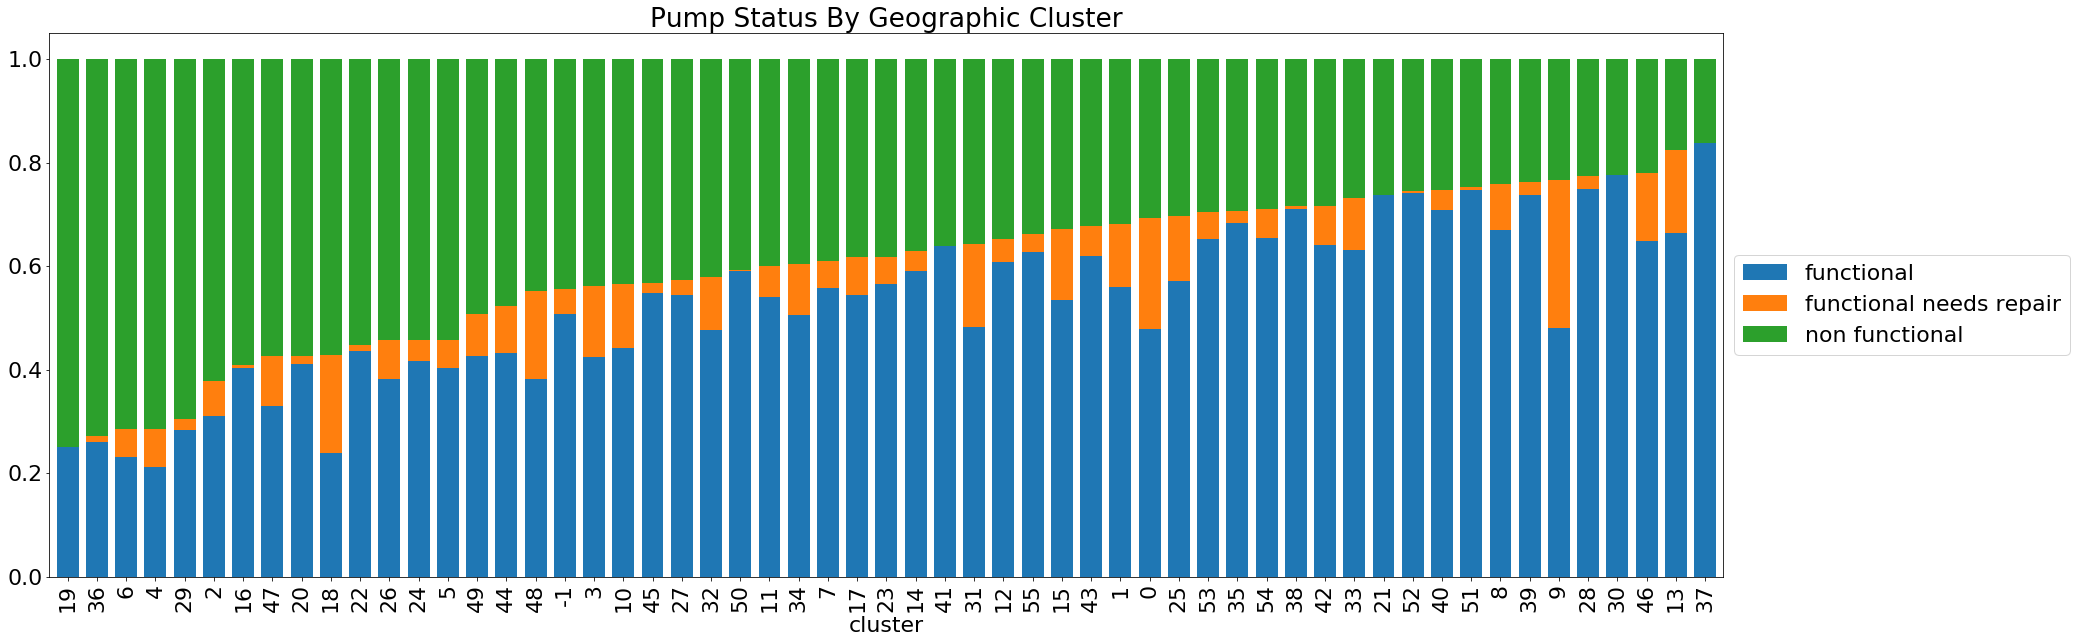

In [136]:
#Create chart of sorted from worse maintance to best 
cluster.sort_values('non functional', ascending=False,).plot(kind="bar", 
                 figsize=(30,10),
                 stacked=True,
      width=0.75)
plt.title('Pump Status By Geographic Cluster')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show();

In [203]:
basin=pd.crosstab(df['basin'], columns=df['status_group'],normalize='index')

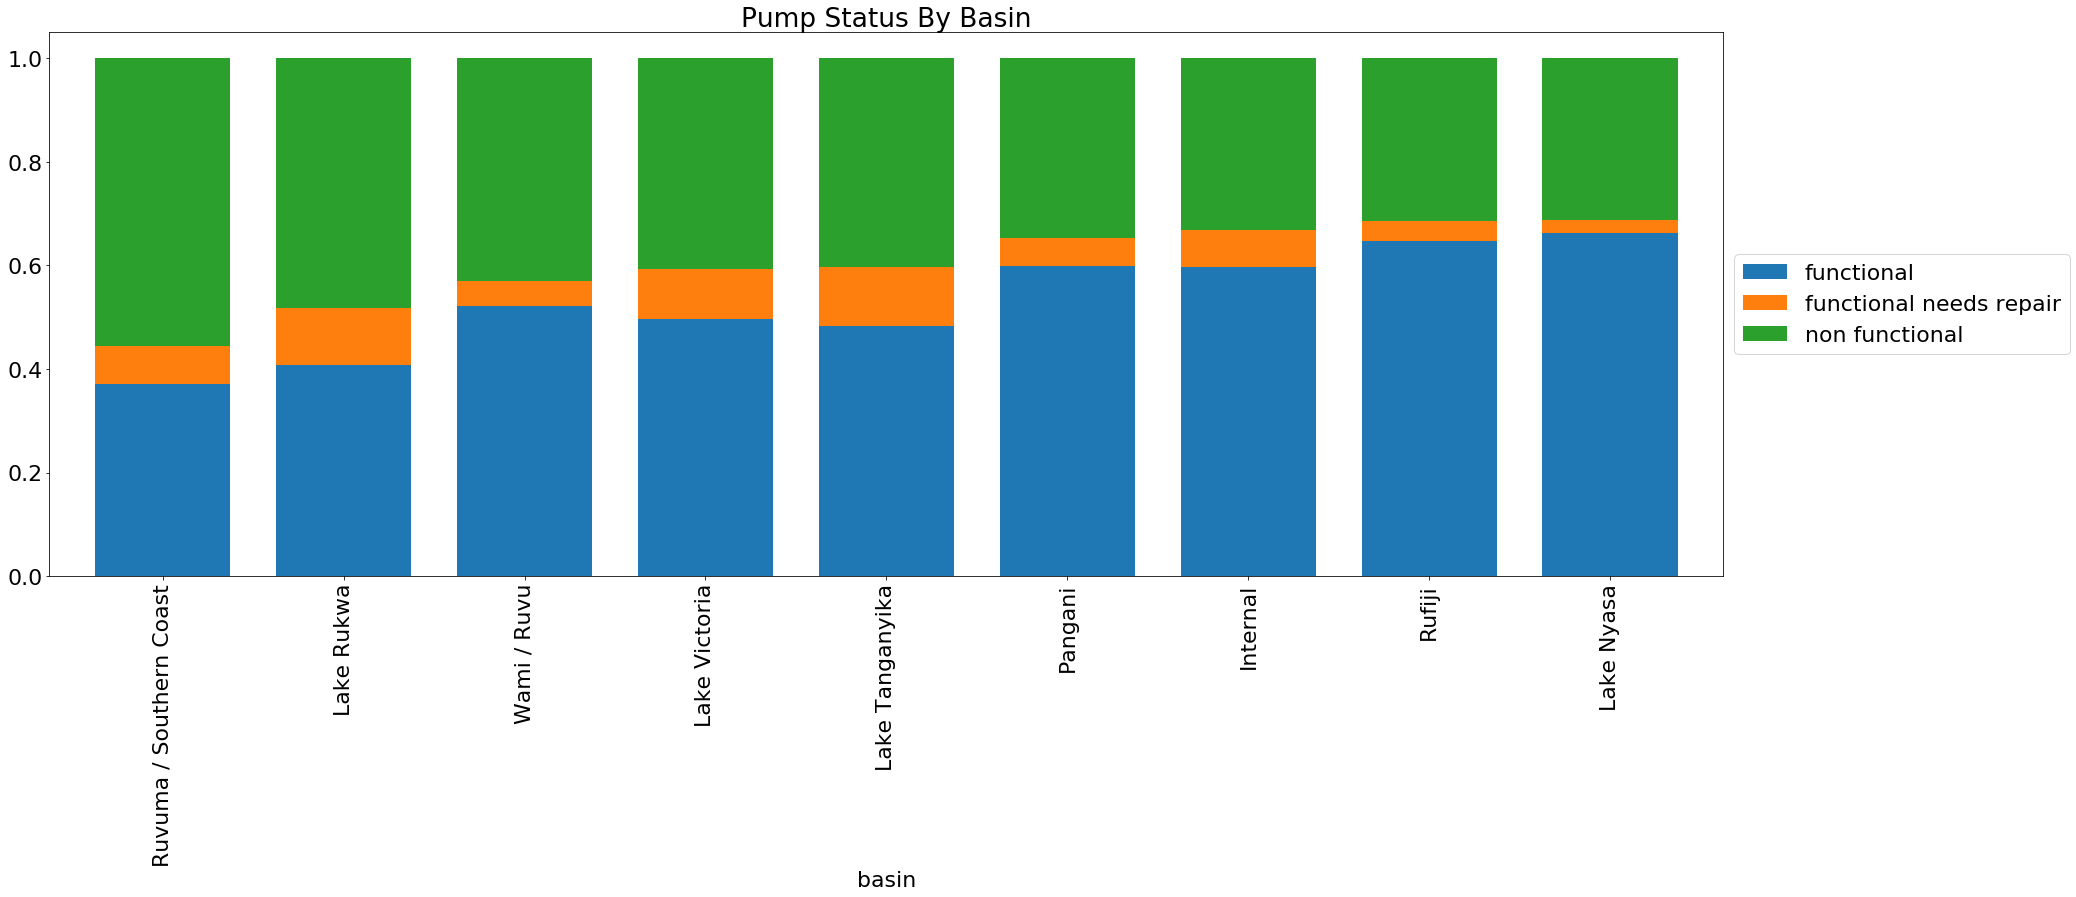

In [204]:
basin.sort_values('non functional', ascending=False,).plot(kind="bar", 
                 figsize=(30,10),
                 stacked=True,
      width=0.75)
plt.title('Pump Status By Basin')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show();

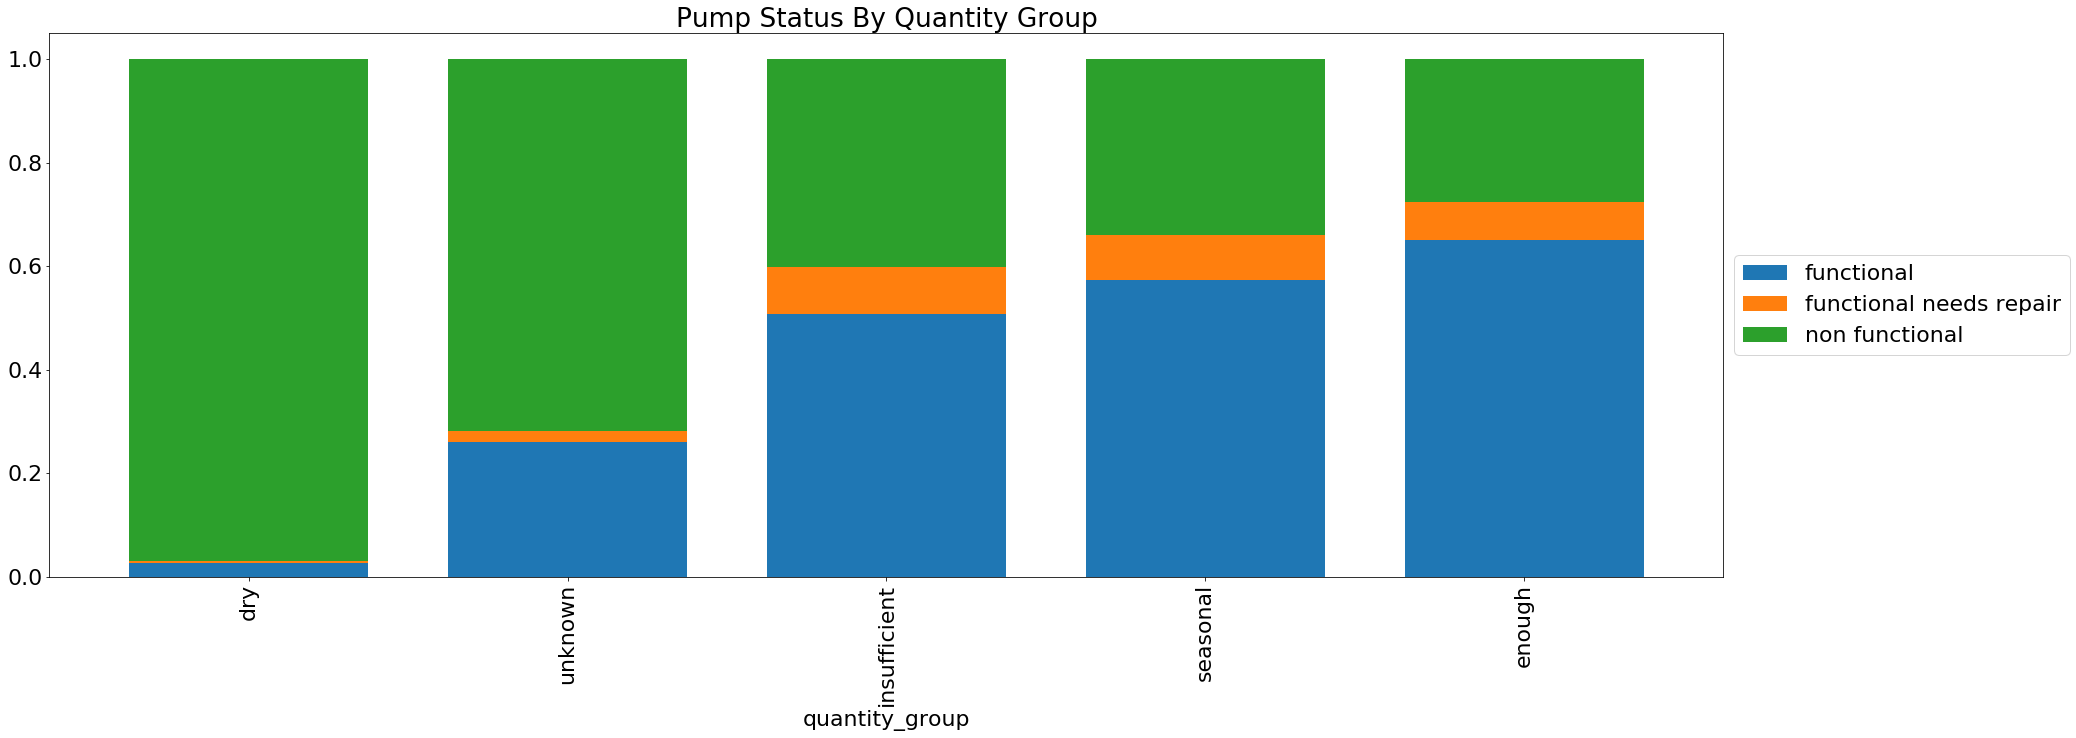

In [205]:
quantity=pd.crosstab(df['quantity_group'], columns=df['status_group'],normalize='index')

quantity.sort_values('non functional', ascending=False,).plot(kind="bar", 
                 figsize=(30,10),
                 stacked=True,
      width=0.75)
plt.title('Pump Status By Quantity Group')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show();

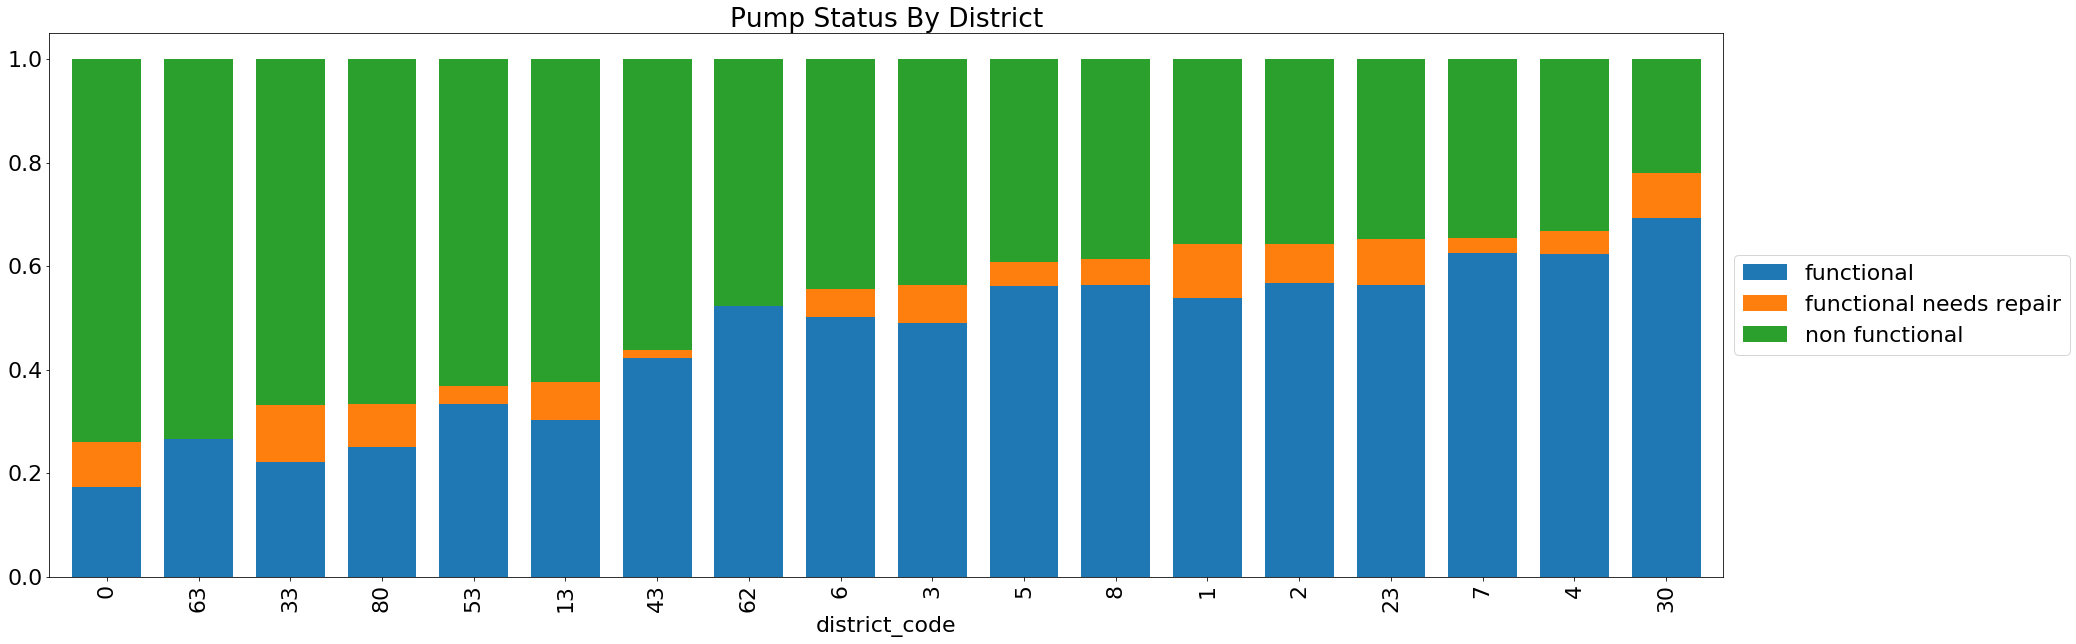

In [207]:
dist=pd.crosstab(df['district_code'], columns=df['status_group'],normalize='index')



dist.sort_values('non functional', ascending=False,).plot(kind="bar", 
                 figsize=(30,10),
                 stacked=True,
      width=0.75)
plt.title('Pump Status By District')
# plt.xticksset_xticklabels(x_ticks, rotation=0, fontsize=8)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show();

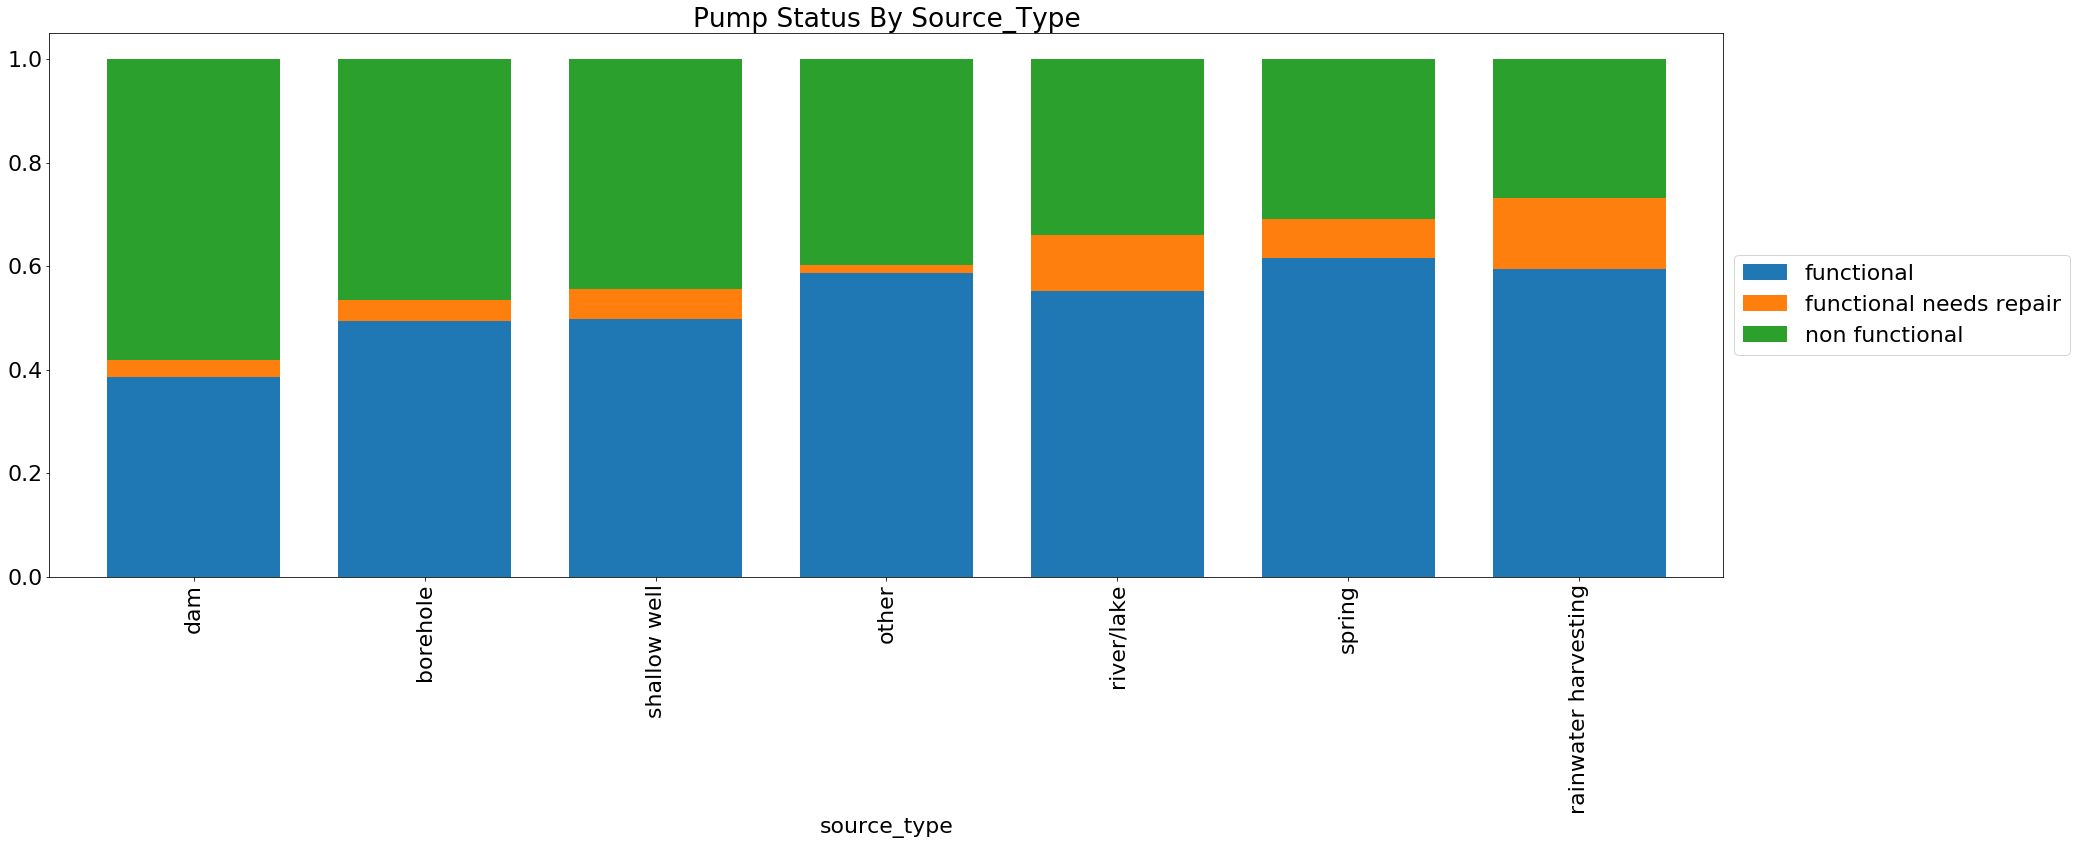

In [208]:
source=pd.crosstab(df['source_type'], columns=df['status_group'],normalize='index')


source.sort_values('non functional', ascending=False,).plot(kind="bar", 
                 figsize=(30,10),
                 stacked=True,
      width=0.75)
plt.title('Pump Status By Source_Type')
# plt.xticksset_xticklabels(x_ticks, rotation=0, fontsize=8)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show();

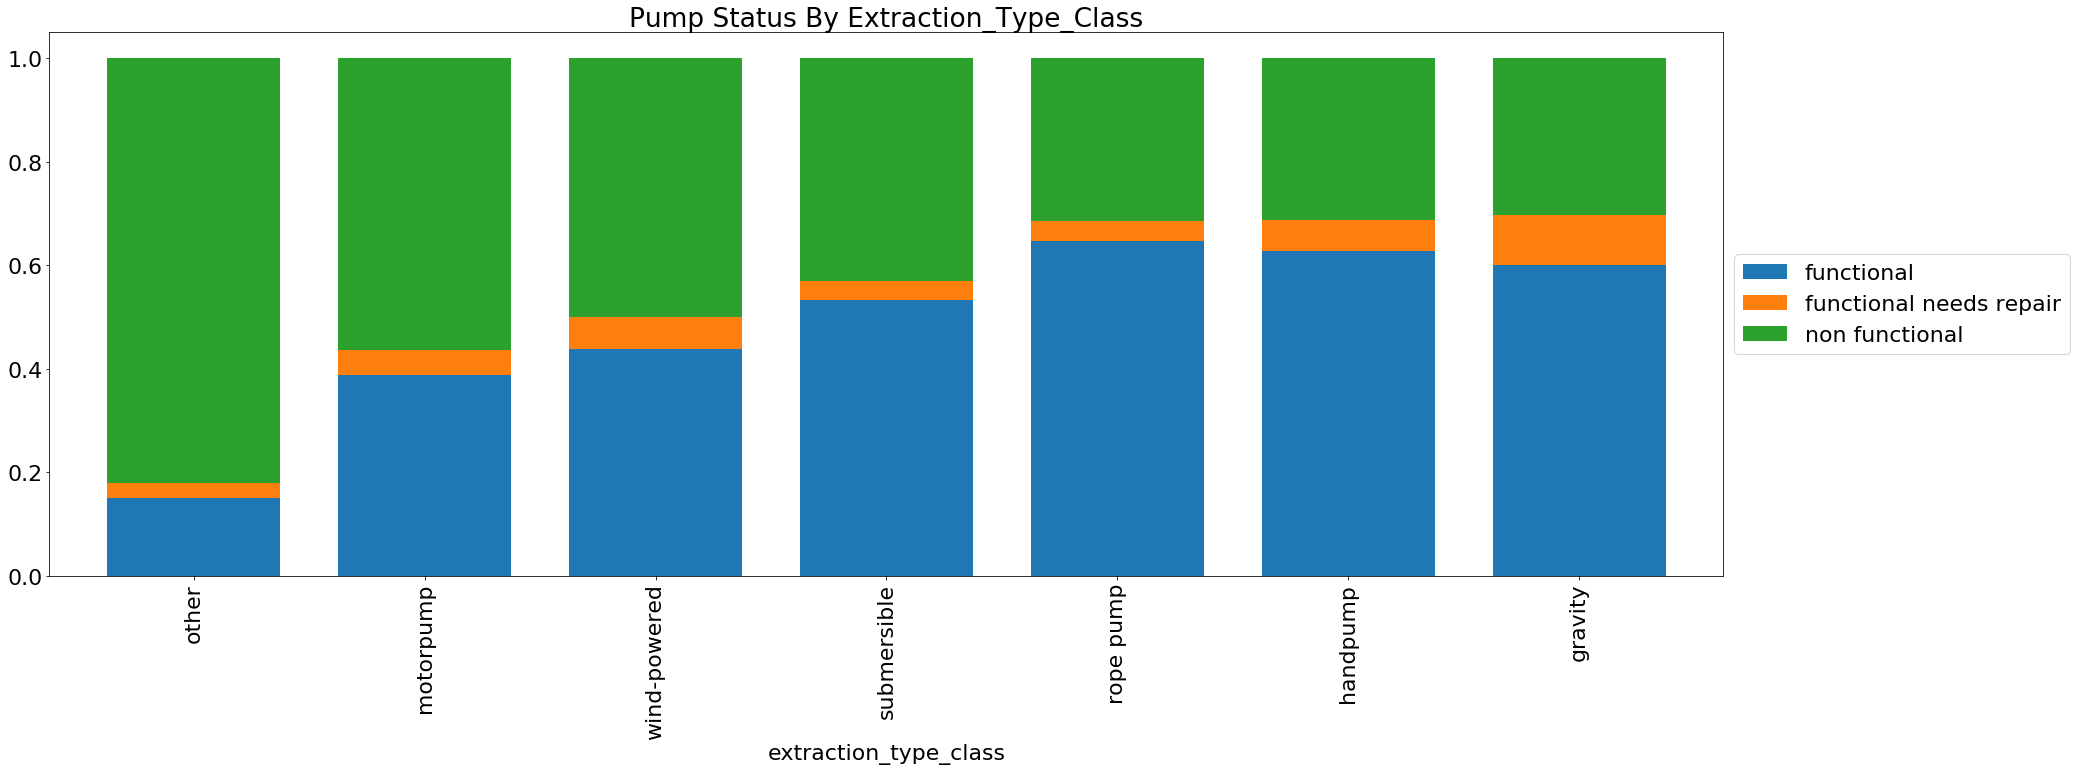

In [209]:
extraction=pd.crosstab(df['extraction_type_class'], columns=df['status_group'],normalize='index')


extraction.sort_values('non functional', ascending=False,).plot(kind="bar", 
                 figsize=(30,10),
                 stacked=True,
      width=0.75)
plt.title('Pump Status By Extraction_Type_Class')
# plt.xticksset_xticklabels(x_ticks, rotation=0, fontsize=8)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show();

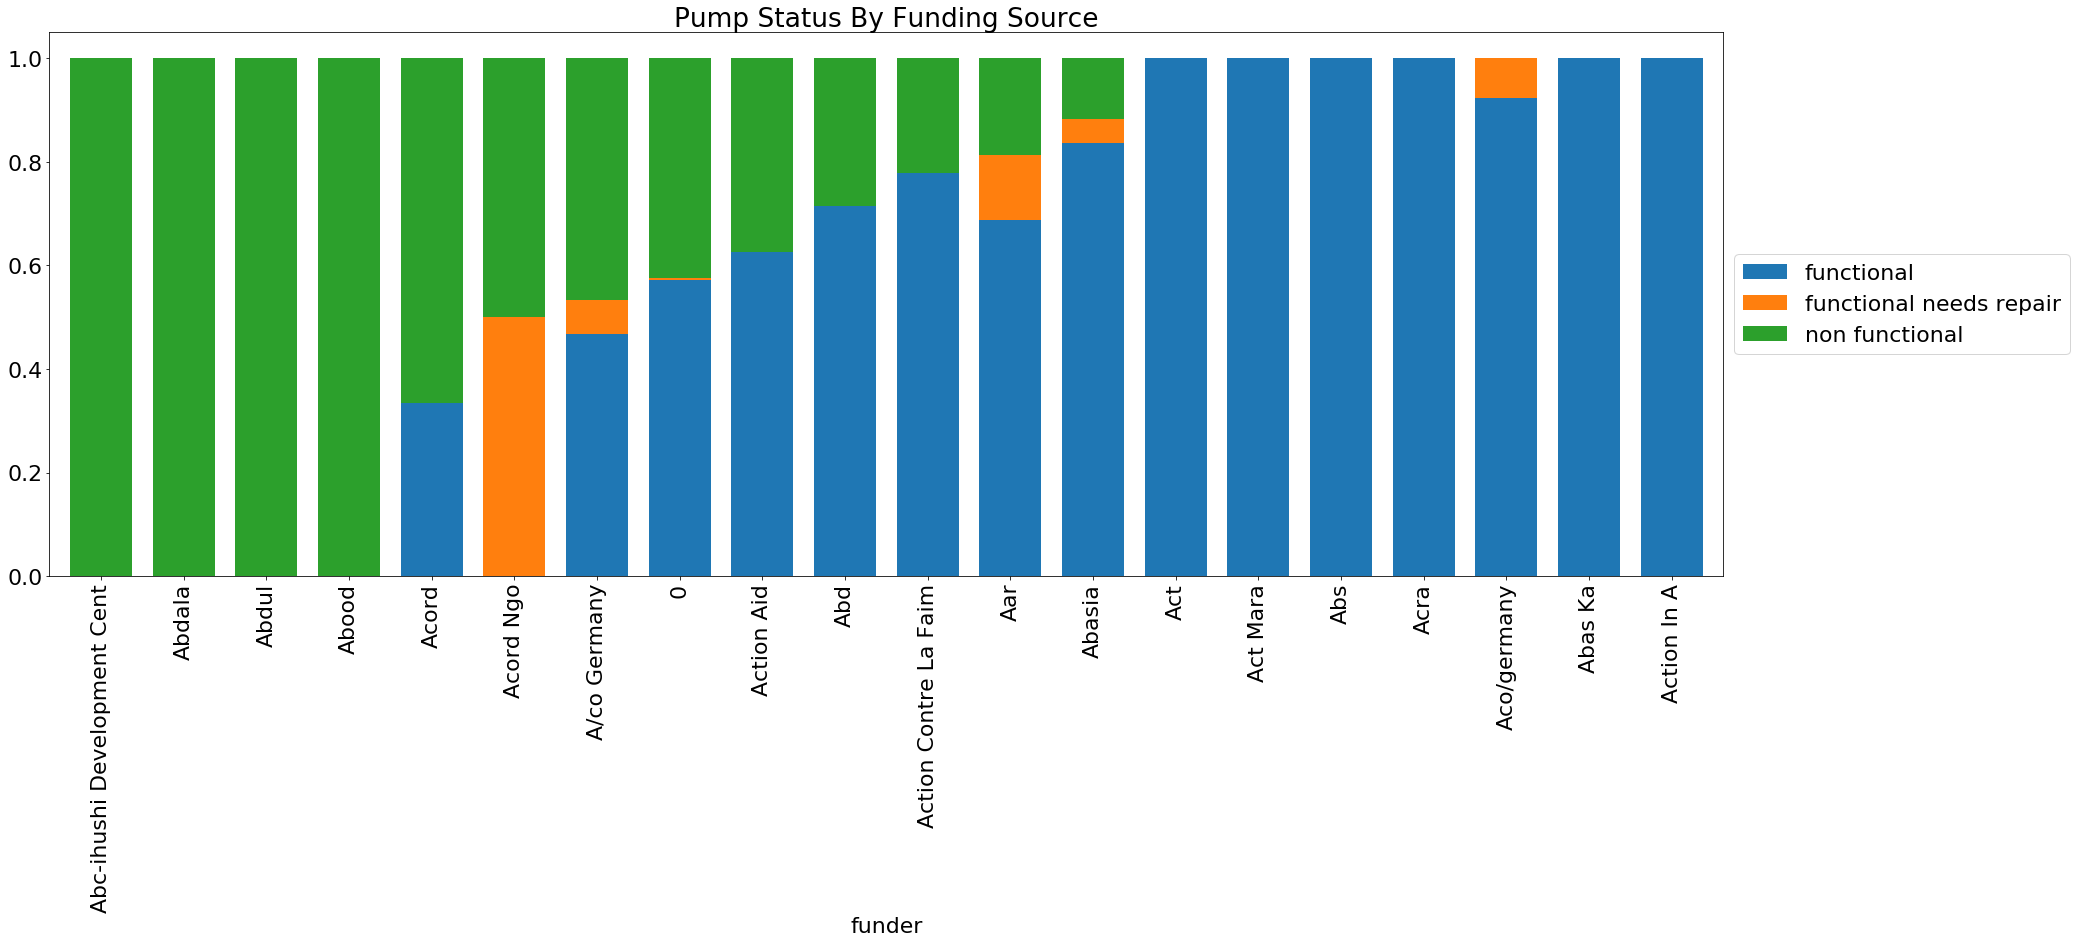

In [210]:
funder=pd.crosstab(df['funder'], columns=df['status_group'],normalize='index').head(20)


funder.sort_values('non functional', ascending=False,).plot(kind="bar", 
                 figsize=(30,10),
                 stacked=True,
      width=0.75)
plt.title('Pump Status By Funding Source')
# plt.xticksset_xticklabels(x_ticks, rotation=0, fontsize=8)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show();

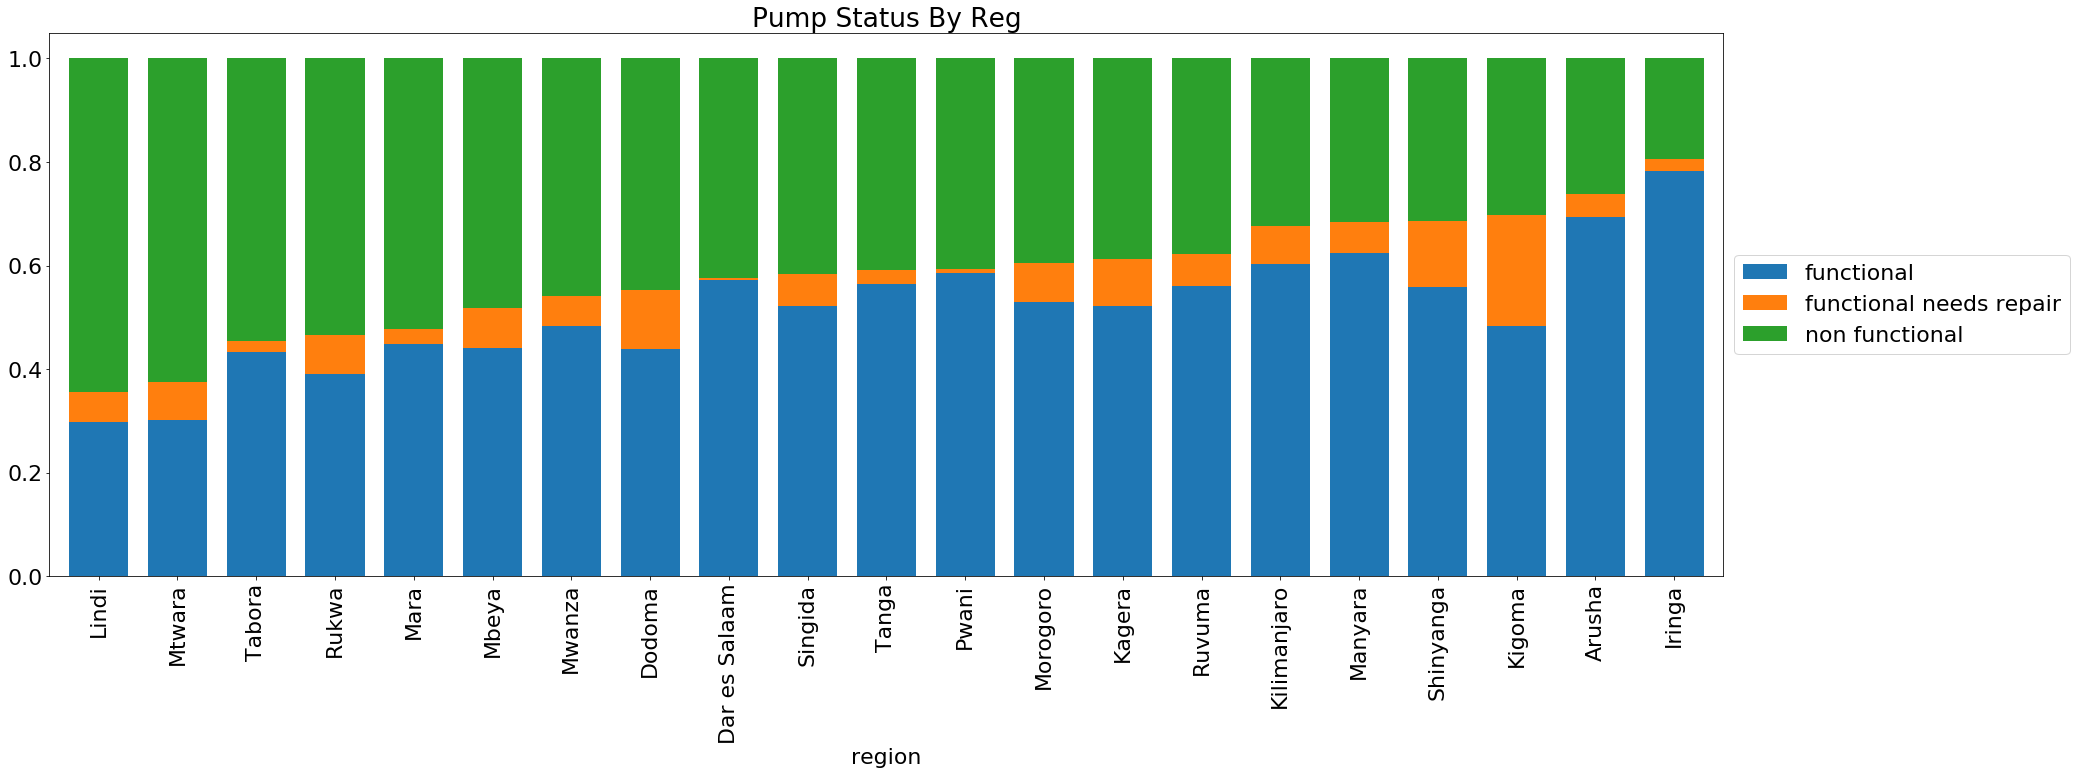

In [211]:
region=pd.crosstab(df['region'], columns=df['status_group'],normalize='index')
# g.sort_values('non functional', ascending=False,).head(10).plot(kind='bar');

region.sort_values('non functional', ascending=False,).plot(kind="bar", 
                 figsize=(30,10),
                 stacked=True,
      width=0.75)
plt.title('Pump Status By Reg')
# plt.xticksset_xticklabels(x_ticks, rotation=0, fontsize=8)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show();

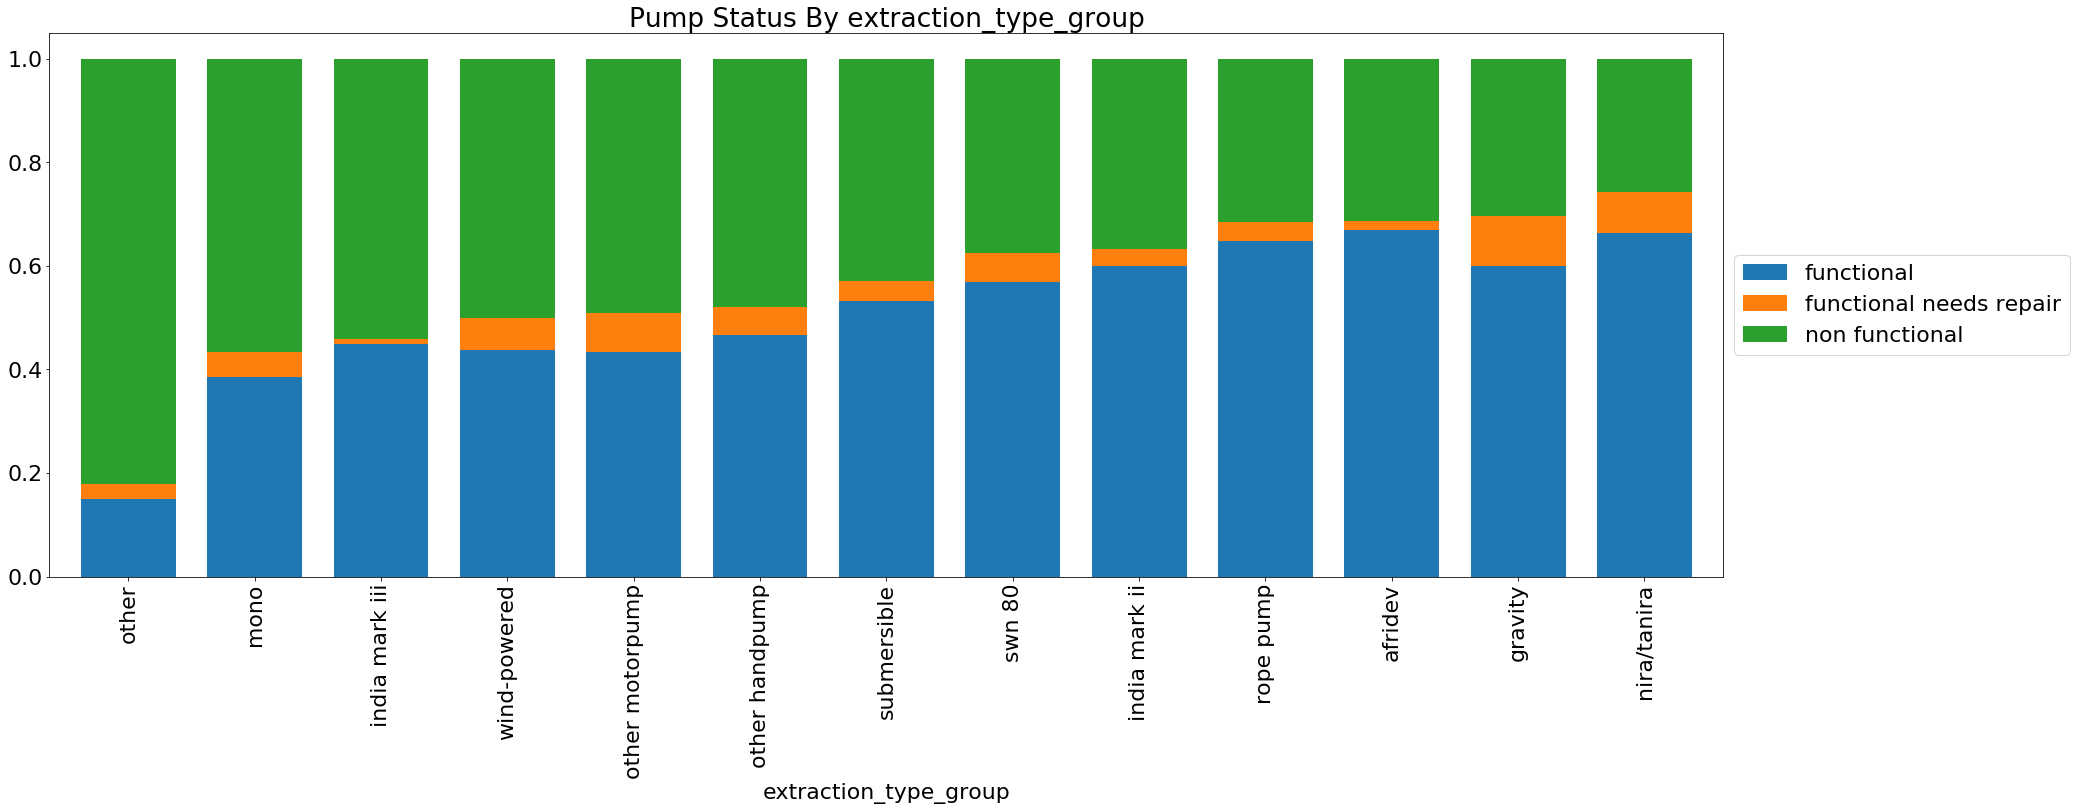

In [212]:
extract_group=pd.crosstab(df['extraction_type_group'], columns=df['status_group'],normalize='index')
# g.sort_values('non functional', ascending=False,).head(10).plot(kind='bar');

extract_group.sort_values('non functional', ascending=False,).plot(kind="bar", 
                 figsize=(30,10),
                 stacked=True,
      width=0.75)
plt.title('Pump Status By extraction_type_group')
# plt.xticksset_xticklabels(x_ticks, rotation=0, fontsize=8)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show();